In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [3]:
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
dataset.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [9]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

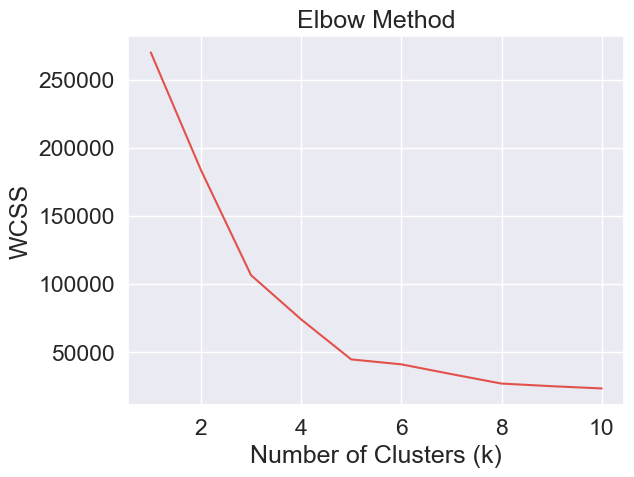

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [11]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

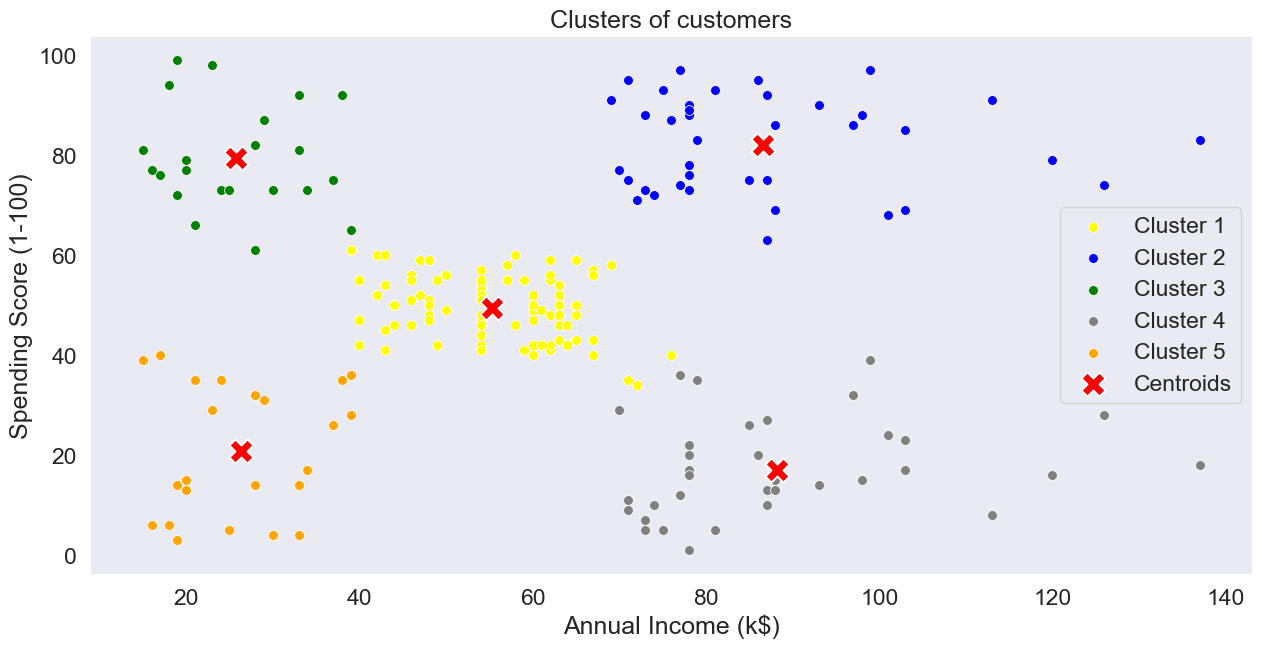

In [12]:
# Visualising the clusters
plt.figure(figsize=(15,7))

sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)

# Centroids
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    color='red', 
    label='Centroids',
    s=300,
    marker='X'
)

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

